# KNN_IRIS Dataset (HyperParameterTuning)

*Importing Libraries*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

*Reading CSV*

In [3]:
data = pd.read_csv("/content/Iris (1).csv")

*Preview of Data*

*  There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
*  There are no null values, so we don't have to worry about that.
*  There are 50 observations of each species (setosa, versicolor, virginica).

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


*Checking Datatypes*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Statistical Details

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


*Total_Species*

In [8]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Data Visualization**


*  After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
*  There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).

<Figure size 1800x600 with 0 Axes>

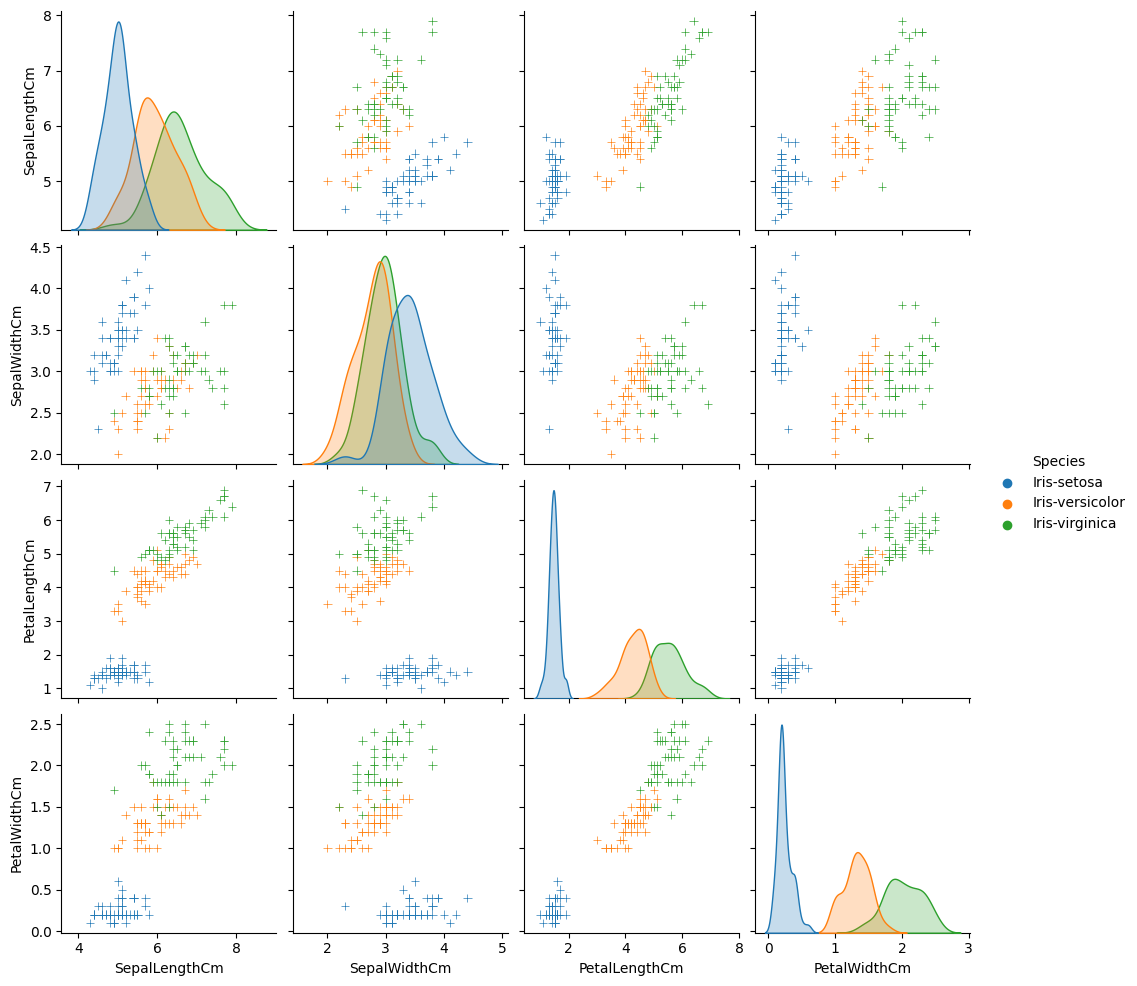

In [12]:
plt.figure(figsize=(18,6))
tmp=data.drop("Id",axis=1)
sns.pairplot(tmp,hue="Species",markers="+")
plt.show()

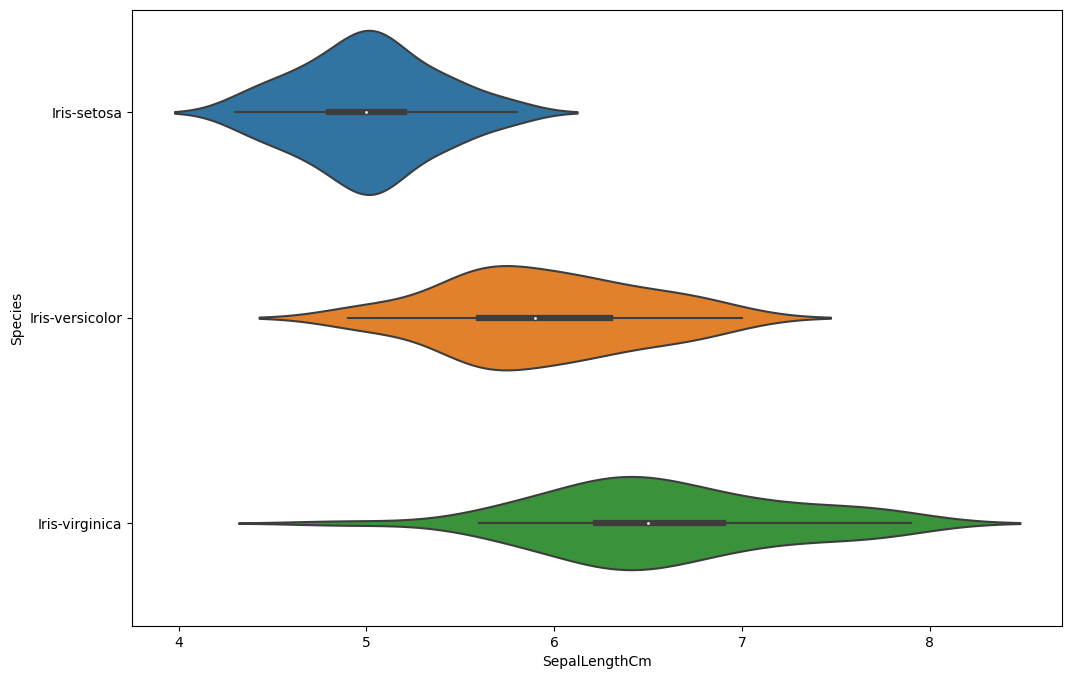

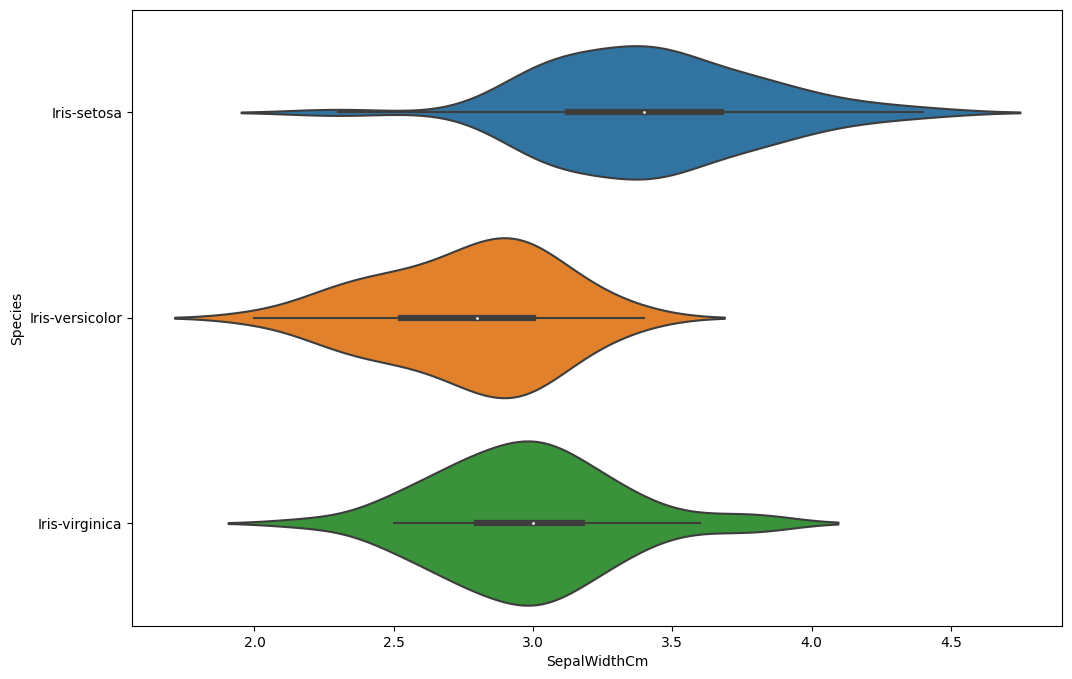

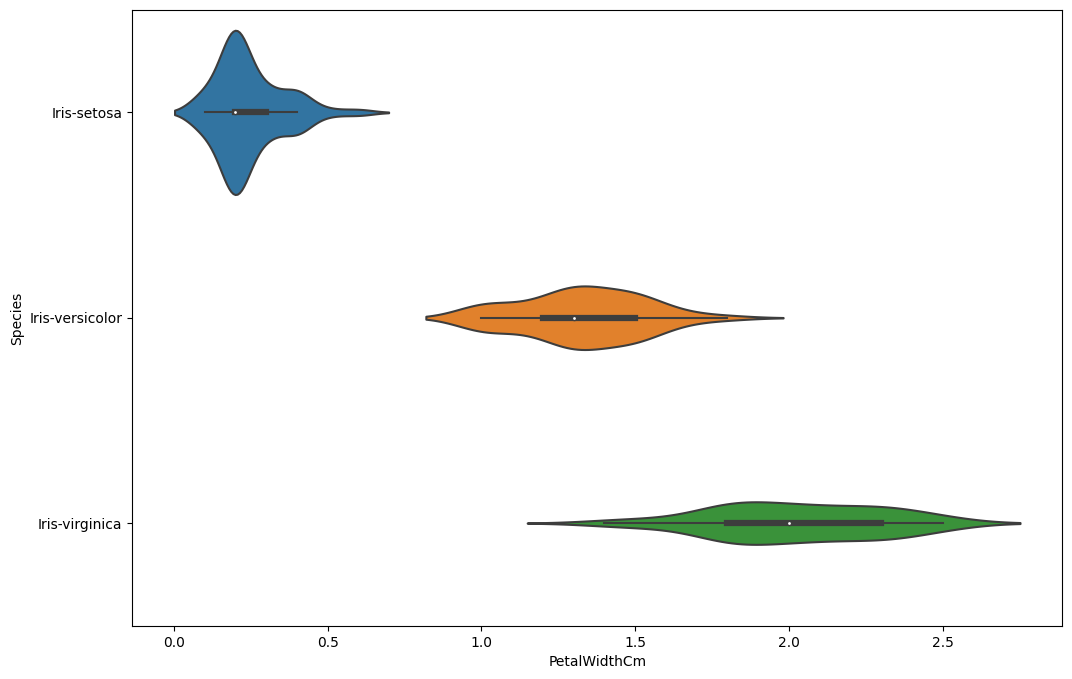

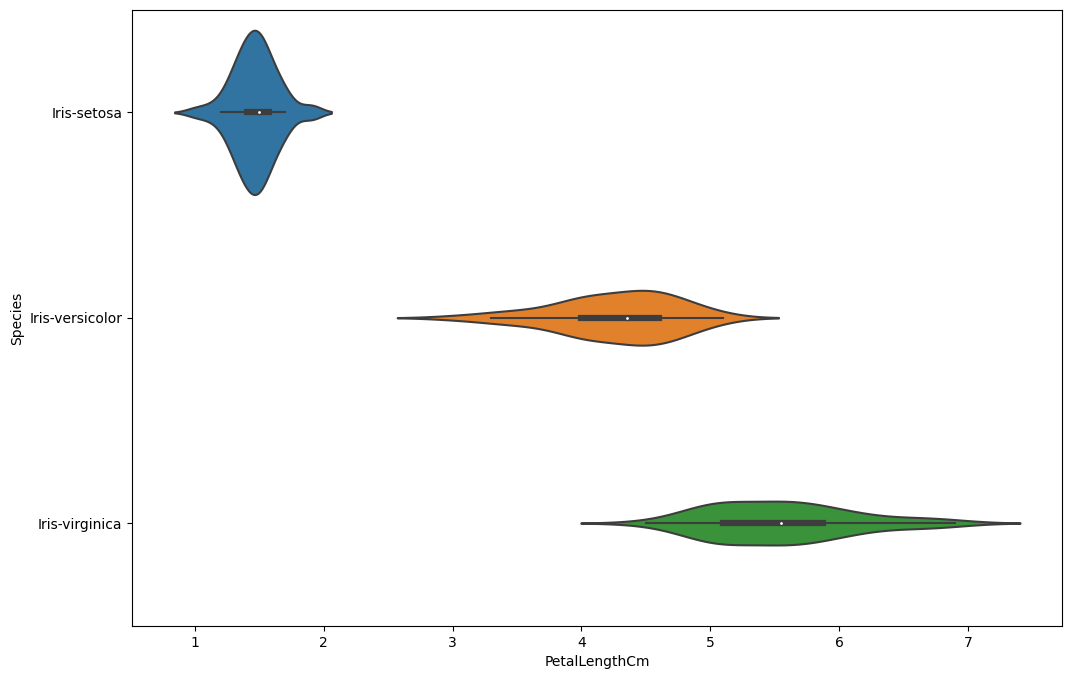

In [17]:
plt.figure(figsize=(12,8))
sns.violinplot(data=data,x="SepalLengthCm",y="Species")
plt.show()
plt.figure(figsize=(12,8))
sns.violinplot(data=data,x="SepalWidthCm",y="Species")
plt.show()
plt.figure(figsize=(12,8))
sns.violinplot(data=data,x="PetalWidthCm",y="Species")
plt.show()
plt.figure(figsize=(12,8))
sns.violinplot(data=data,x="PetalLengthCm",y="Species")
plt.show()

*Spliting the Data*

In [27]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=5)

*Importing KNN model*

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
KNN=KNeighborsClassifier()
KNN.fit(X,y)

KNeighborsClassifier()

KNeighborsClassifier()

In [34]:
y_predict=KNN.predict(X_test)
y_predict

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-seto

***HyperParameter Tuning***

In [35]:
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [62]:
params={'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
        'n_neighbors': [3,5,7,9,12],
        'weights': ["uniform","distance"]
        }

*Importing GridSearchCV*

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
GRID=GridSearchCV(
estimator=KNN,param_grid=params,scoring="accuracy",cv=5
)

In [65]:
GRID.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 12],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [66]:
GRID.best_params_

{'algorithm': 'auto', 'n_neighbors': 12, 'weights': 'distance'}

In [67]:
GRID.best_score_

0.9866666666666667

# Thank YOU!!!! 😊